In [55]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## testing

In [5]:
pref = "静岡県"
url = f"https://tool.shlc.jp/saichin_pref/?pr={pref}"

<!DOCTYPE html>
<html lang="ja">

<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <meta name="keywords" content="">

            <meta name="description" content="各都道府県における地域別最低賃金の2002年以降の推移表です。" />
      
  
  <title>地域別最低賃金　都道府県別推移表 &#8211; 社労士Tools</title>
<meta name='robots' content='max-image-preview:large' />
<!-- Jetpack Site Verification Tags -->
<meta name="google-site-verification" content="e1gavNu8P4_dX9IqZXngp_T8W9_HOdCYwtLjVV6Z9uo" />
<link rel='dns-prefetch' href='//ajax.googleapis.com' />
<link rel='dns-prefetch' href='//s7.addthis.com' />
<link rel="alternate" type="application/rss+xml" title="社労士Tools &raquo; 地域別最低賃金 都道府県別推移表 のコメントのフィード" href="https://tool.shlc.jp/saichin_pref/feed/" />
<script type="text/javascript">
window._wpemojiSettings = {"baseUrl":"https:\/\/s.w.org\/images\/core\/emoji\/14.0.0\/72x72\/","ext":".png","svgUrl":"https:\/\/s.w.org\/images\/core\/emoji\/14.0.0\/svg\/","svgExt":".svg","source":
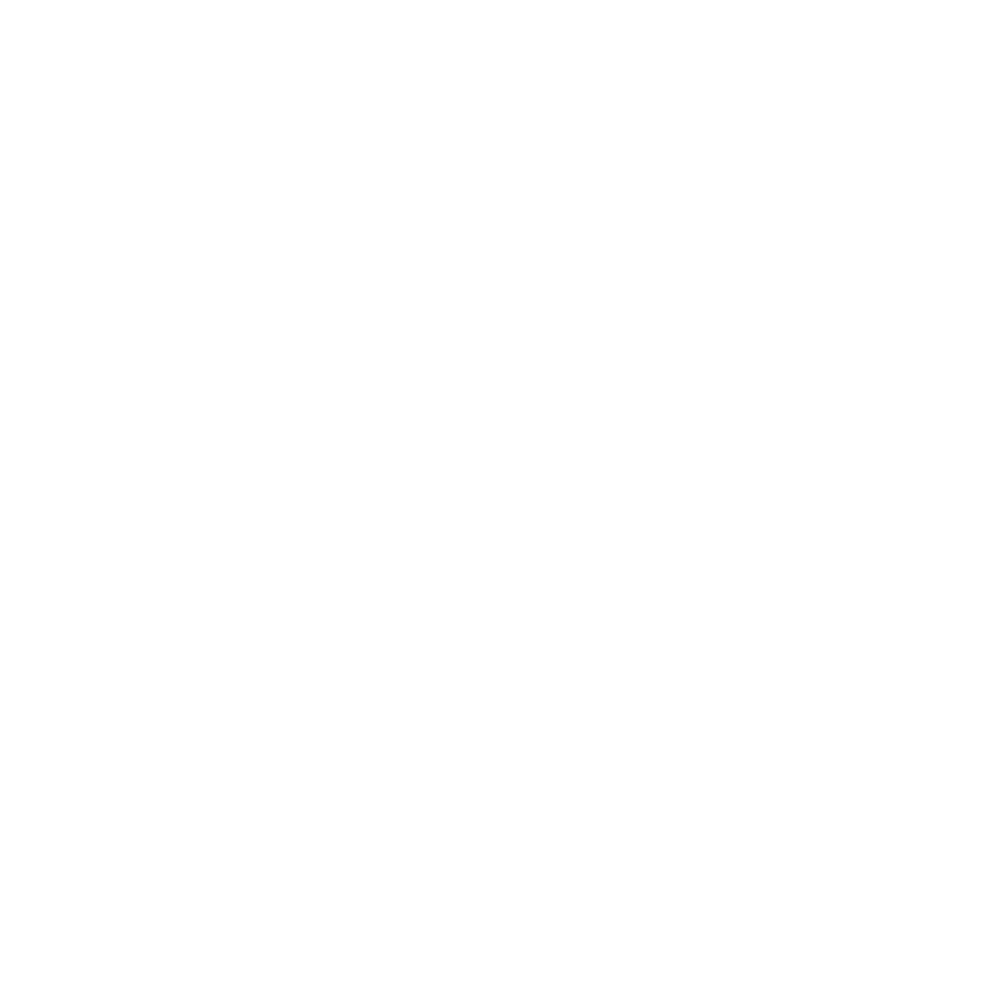
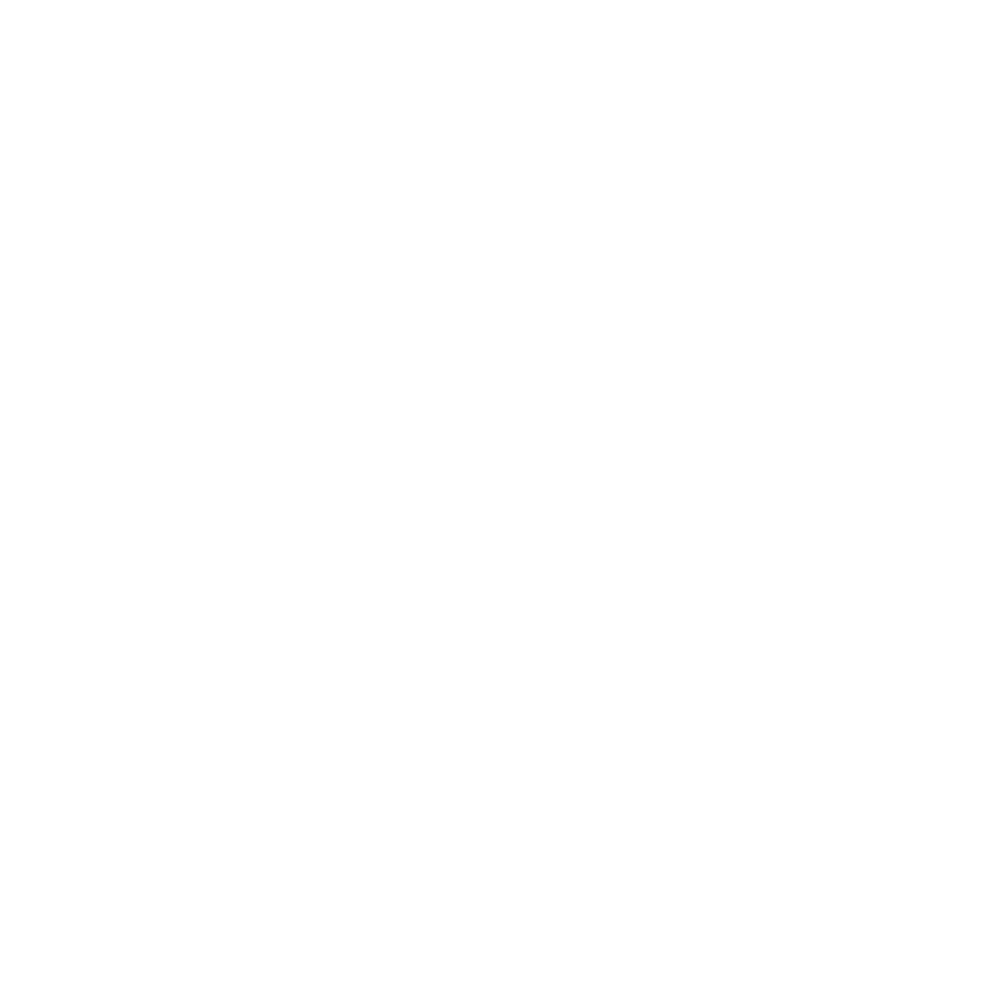
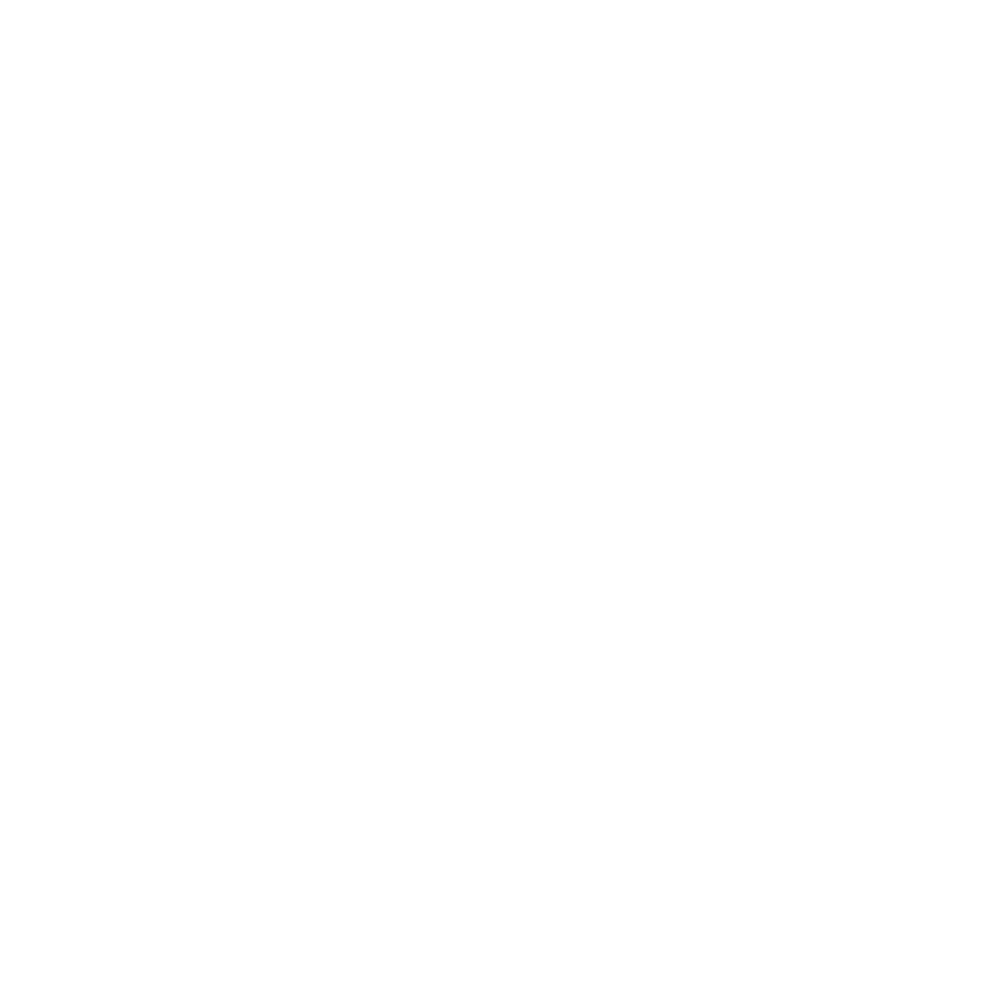
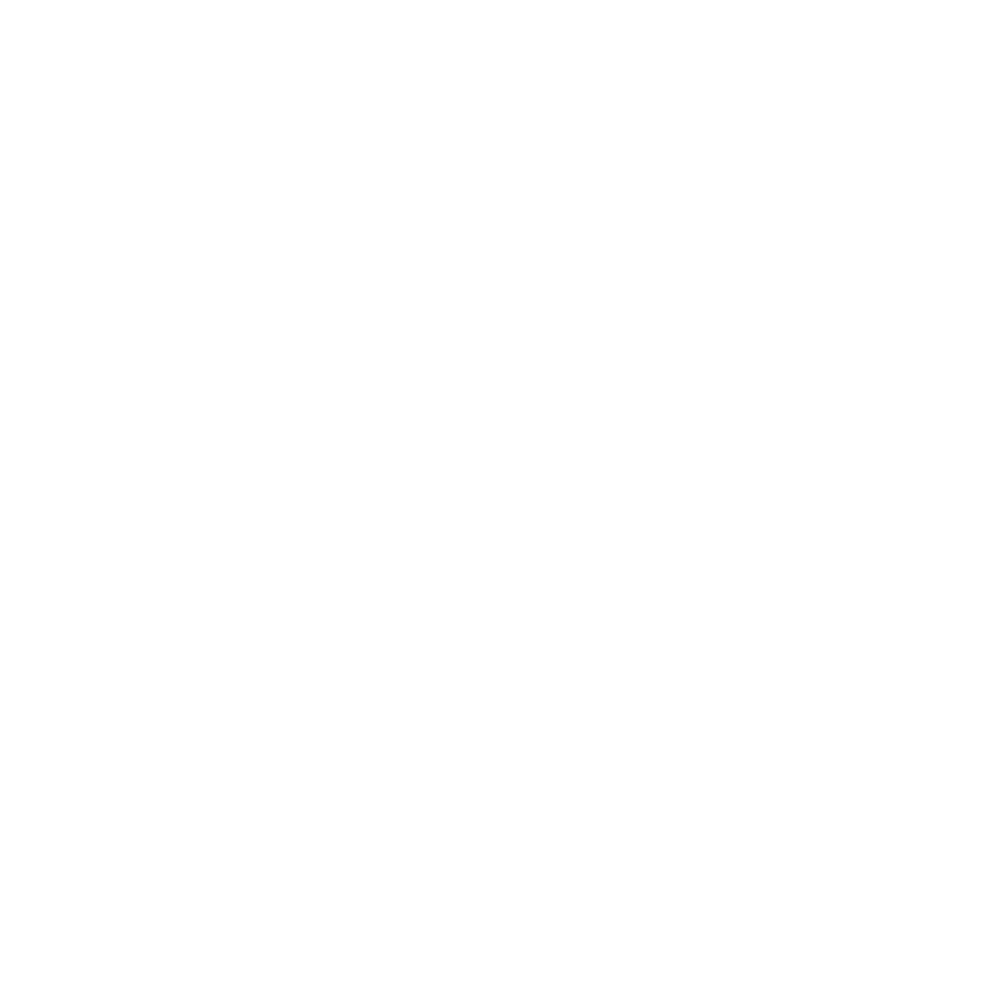
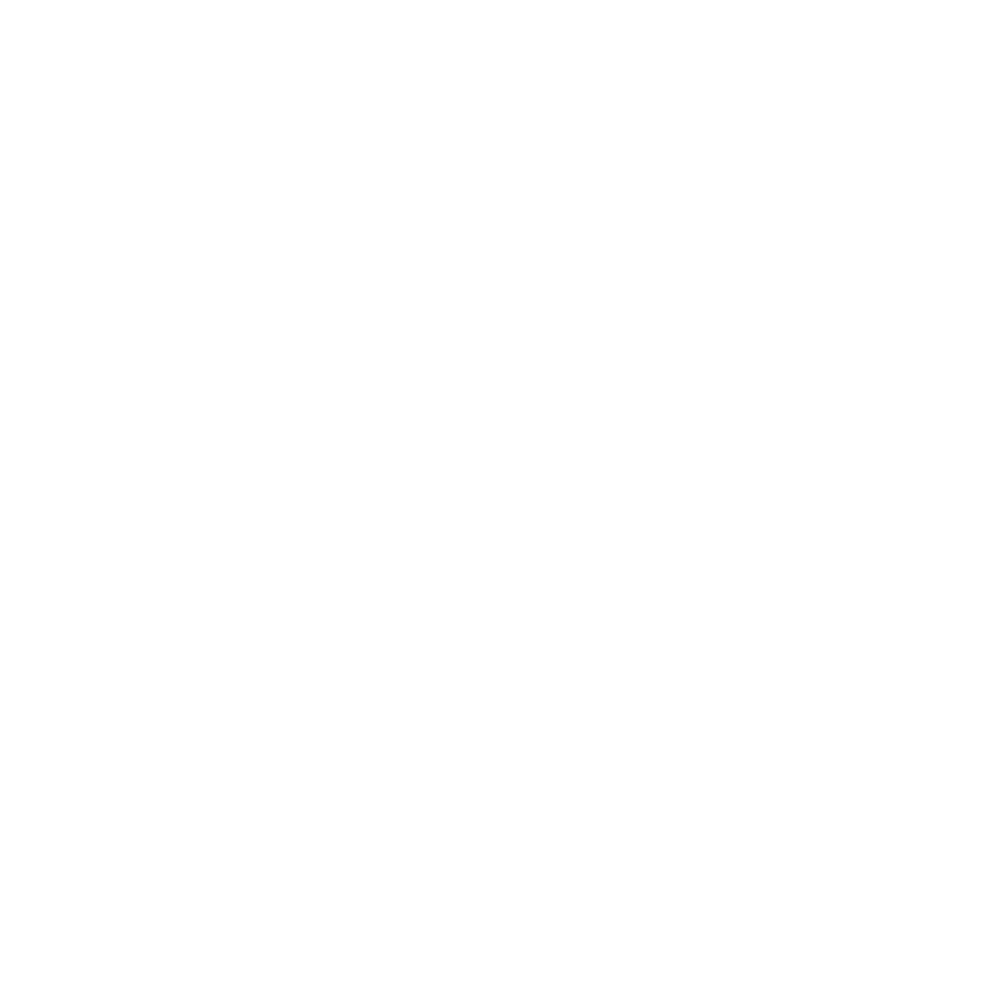
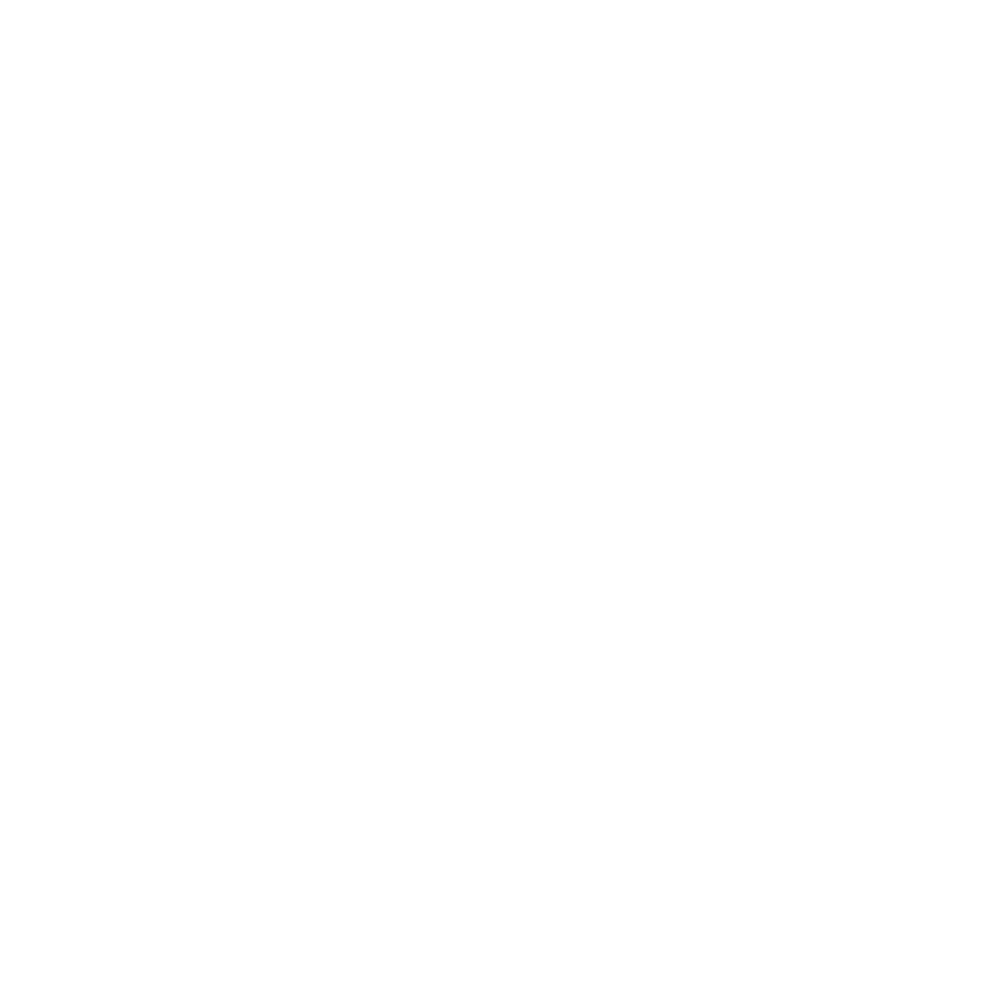
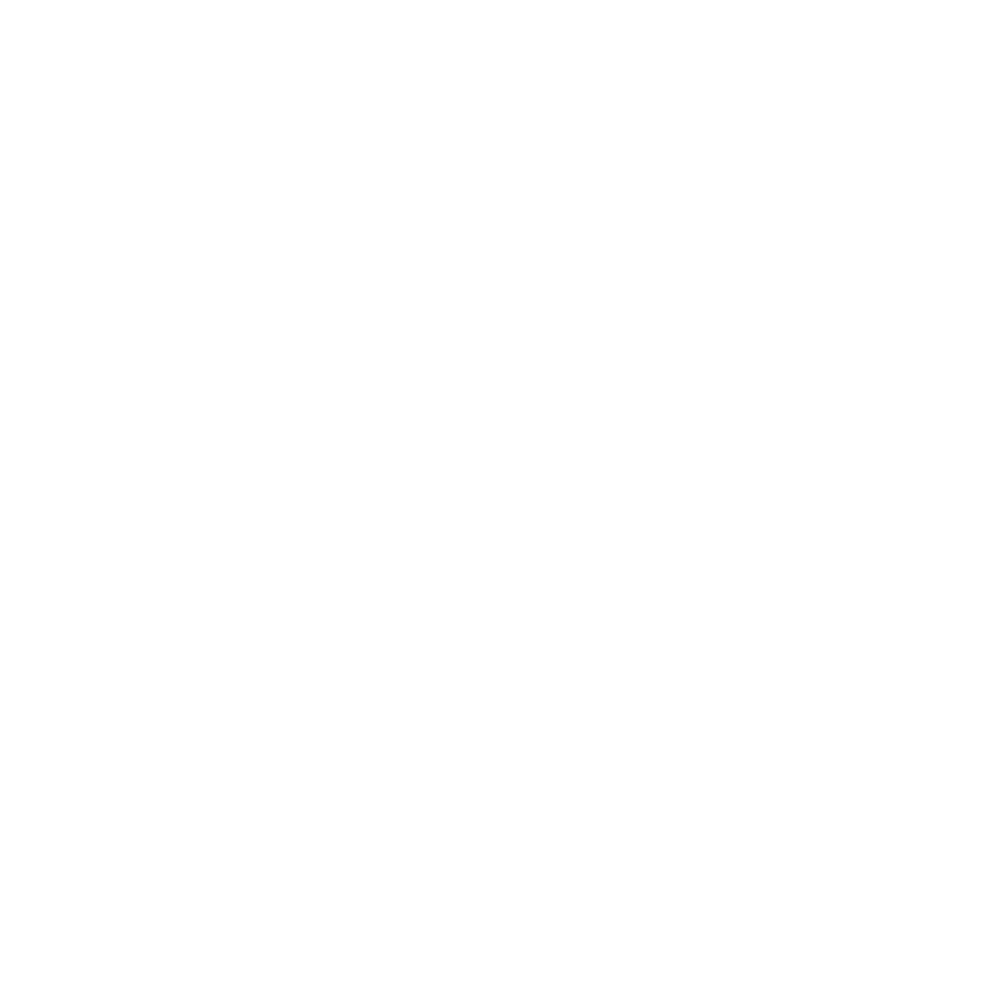
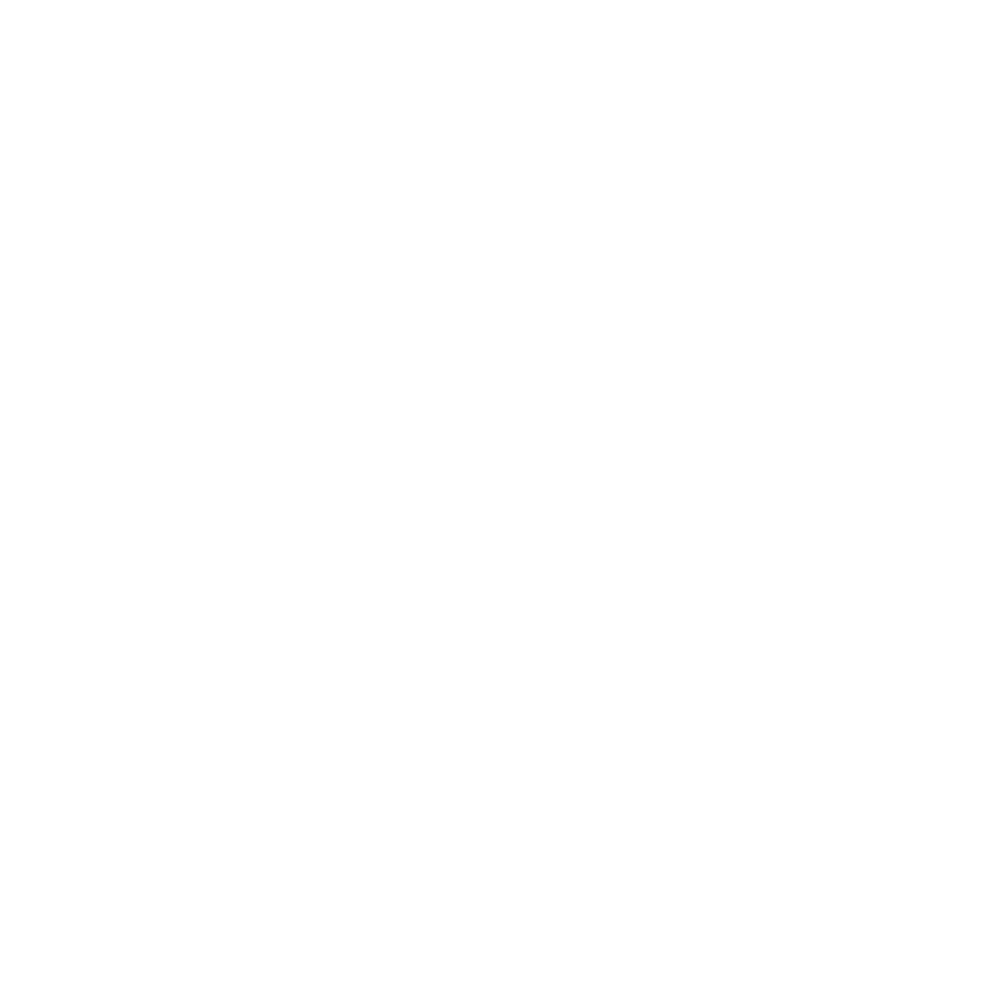
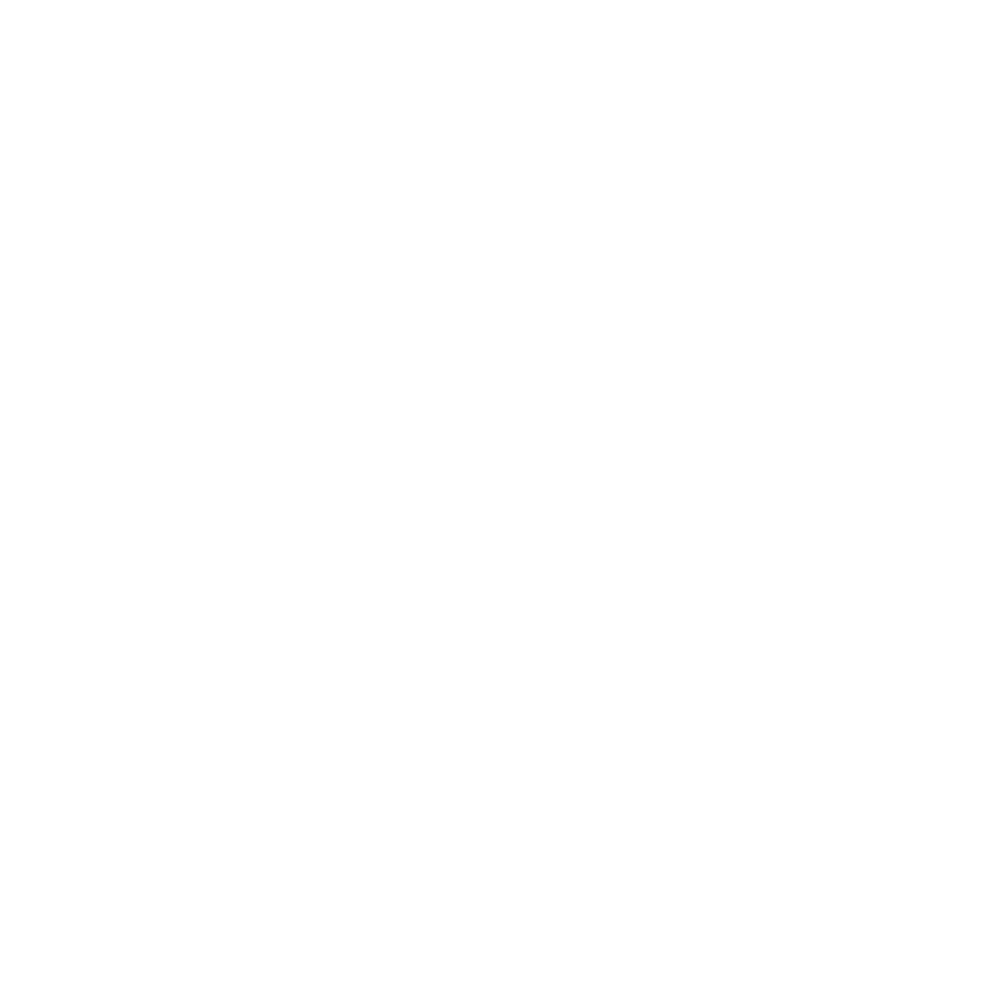
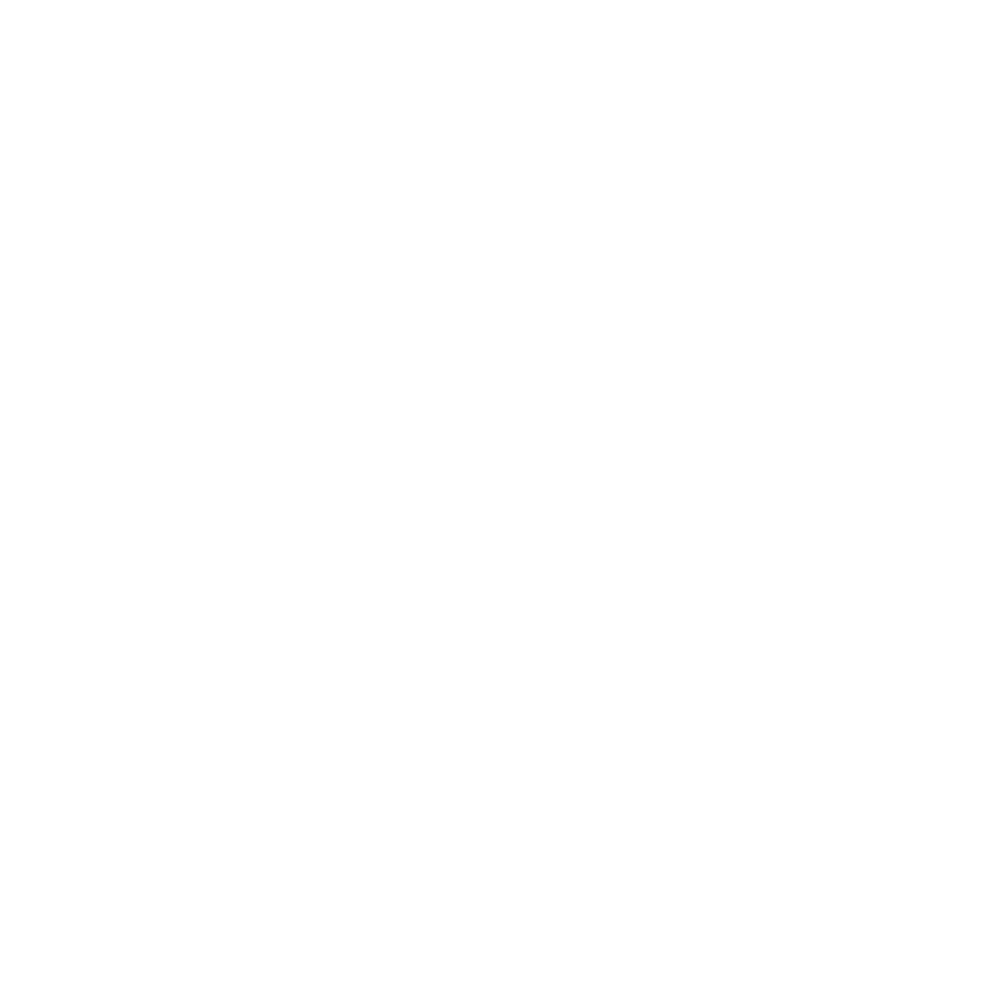
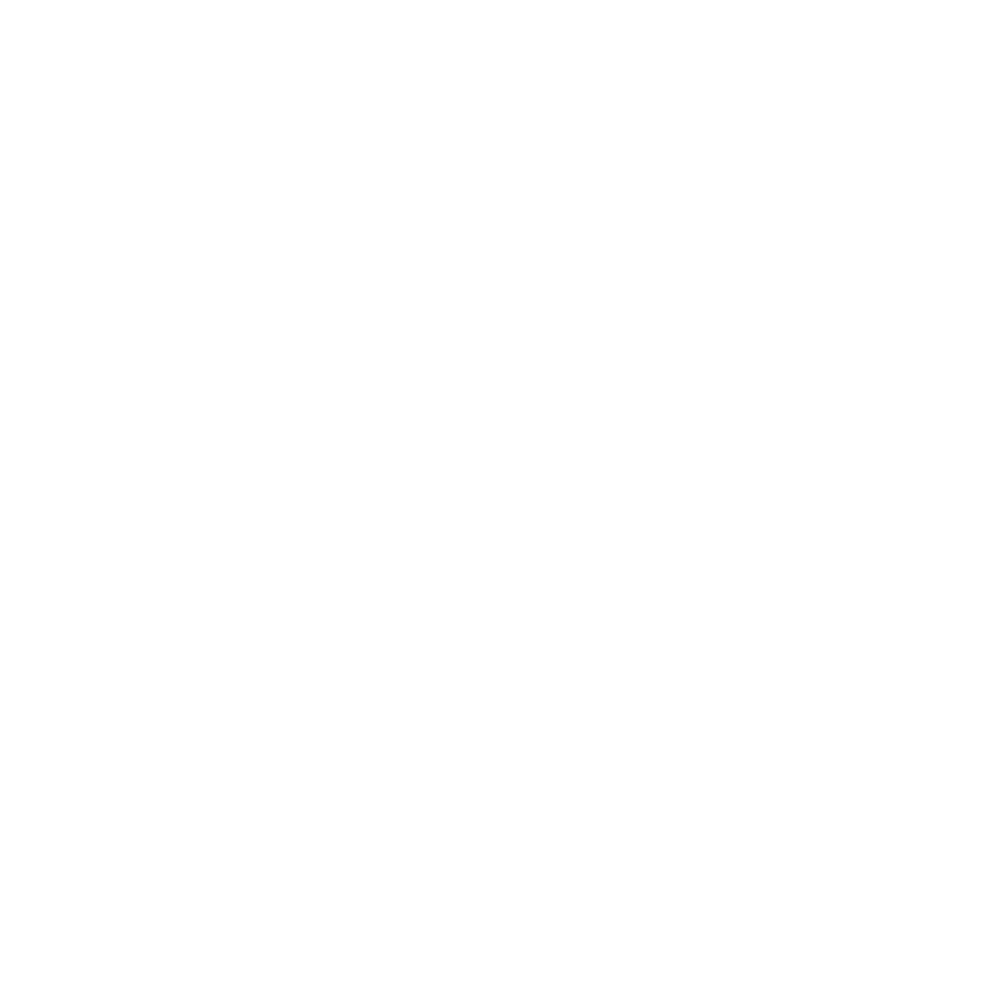
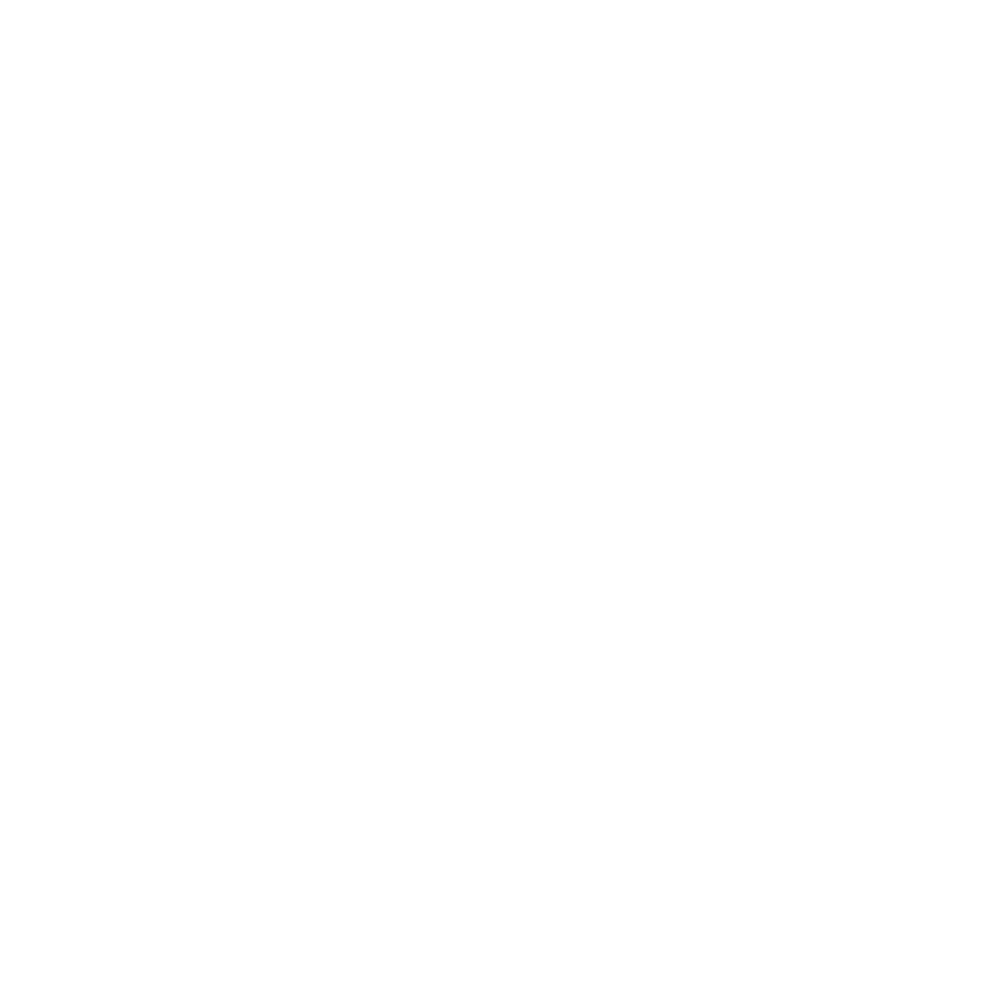
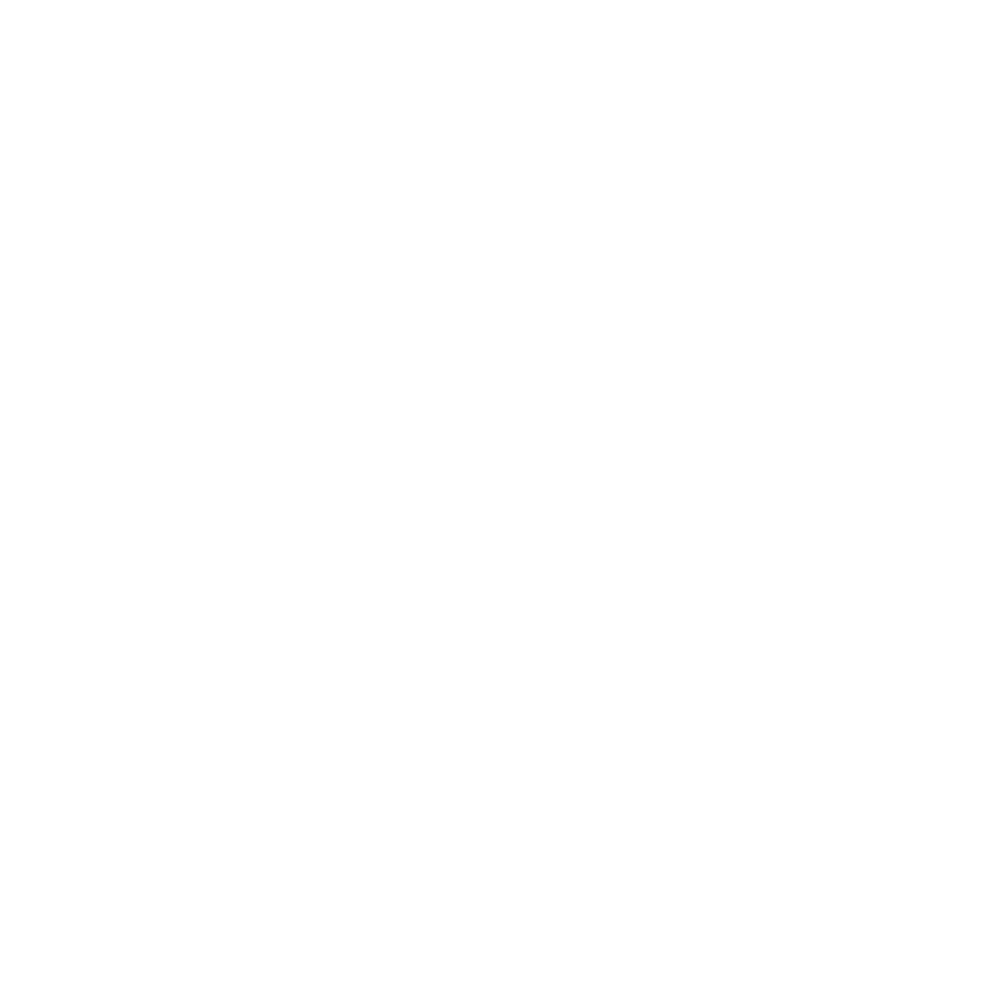
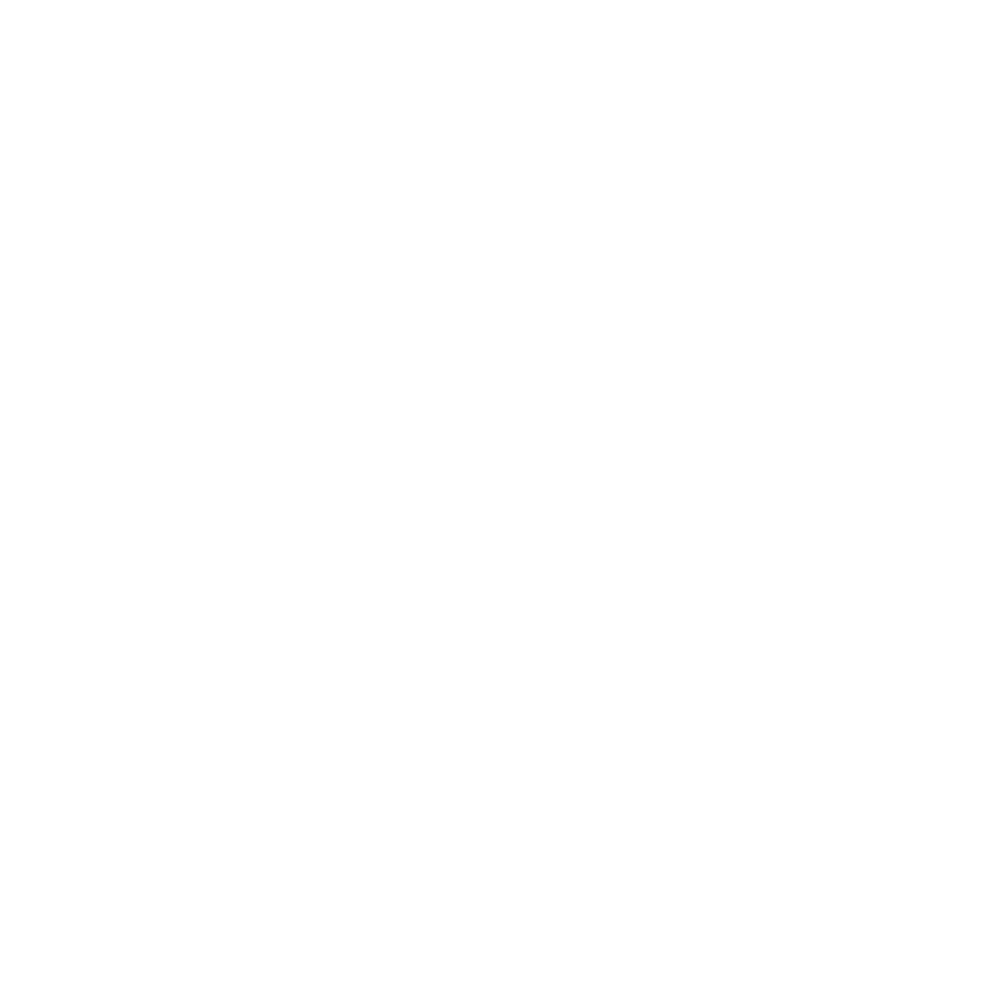
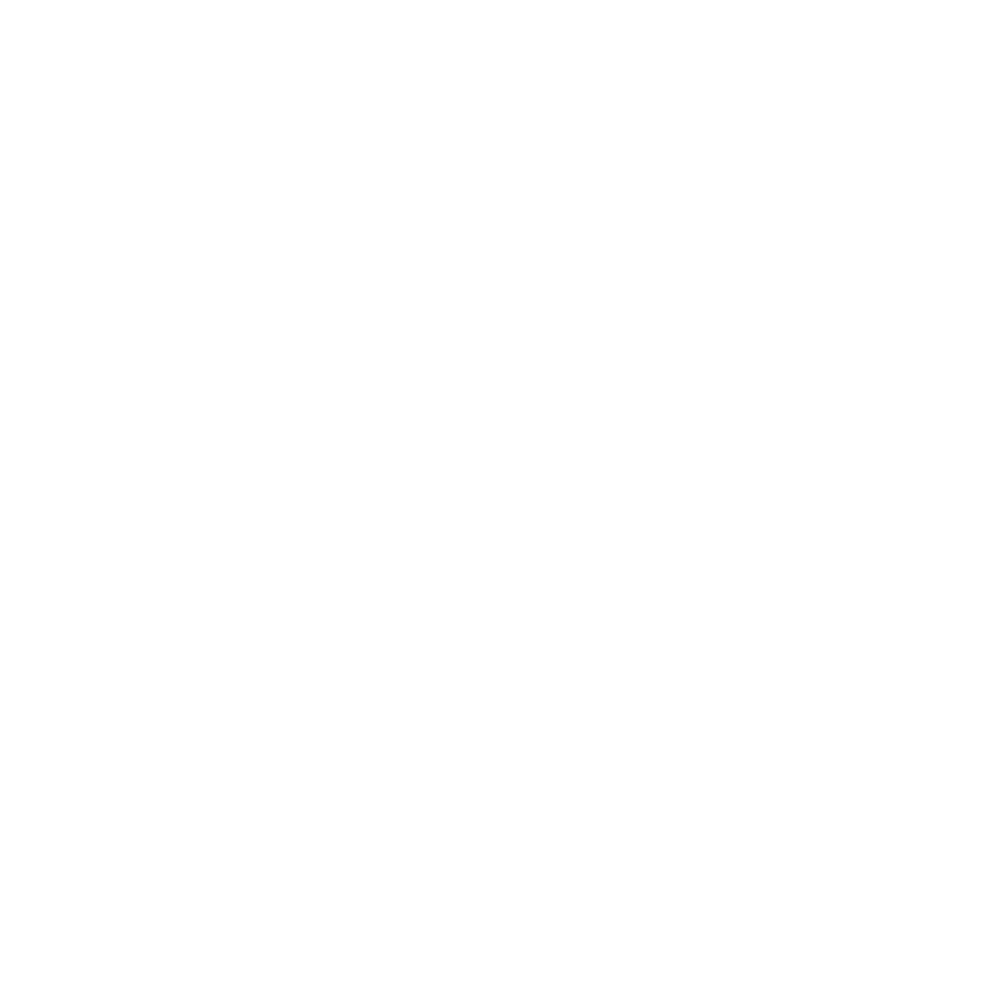
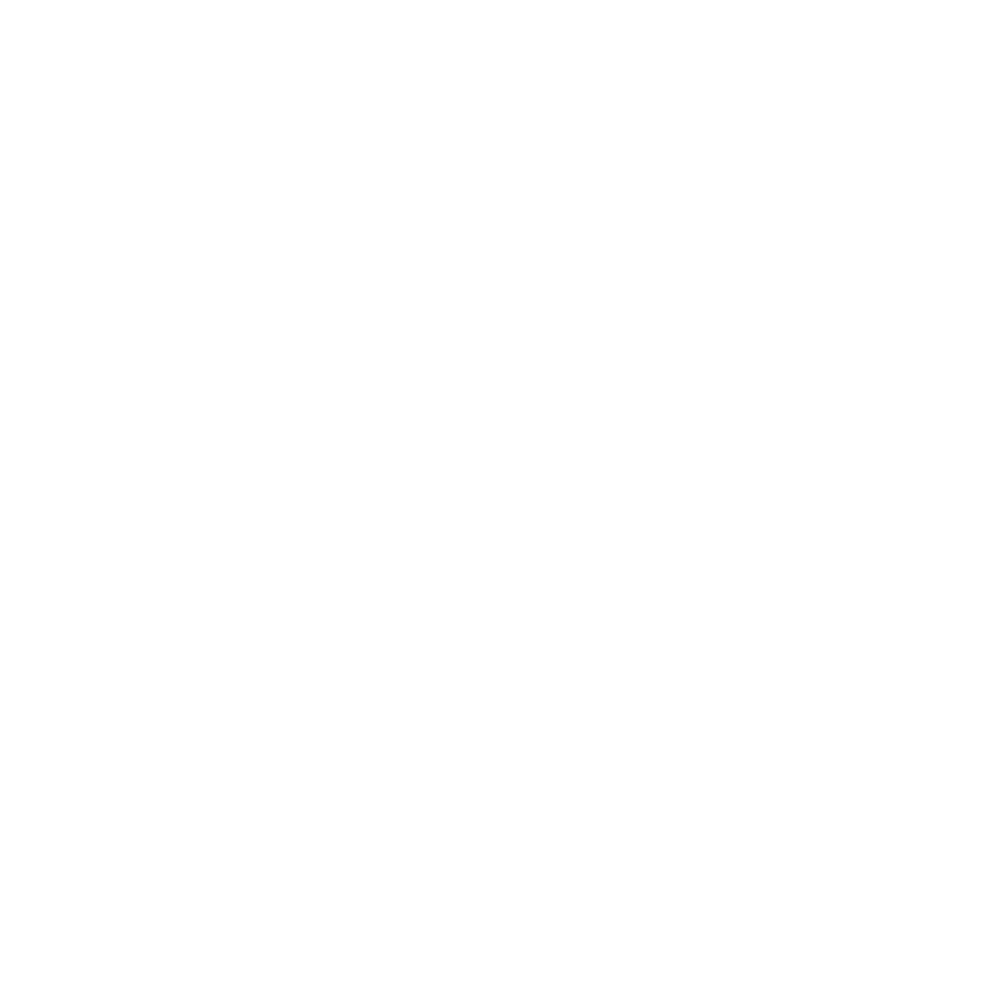
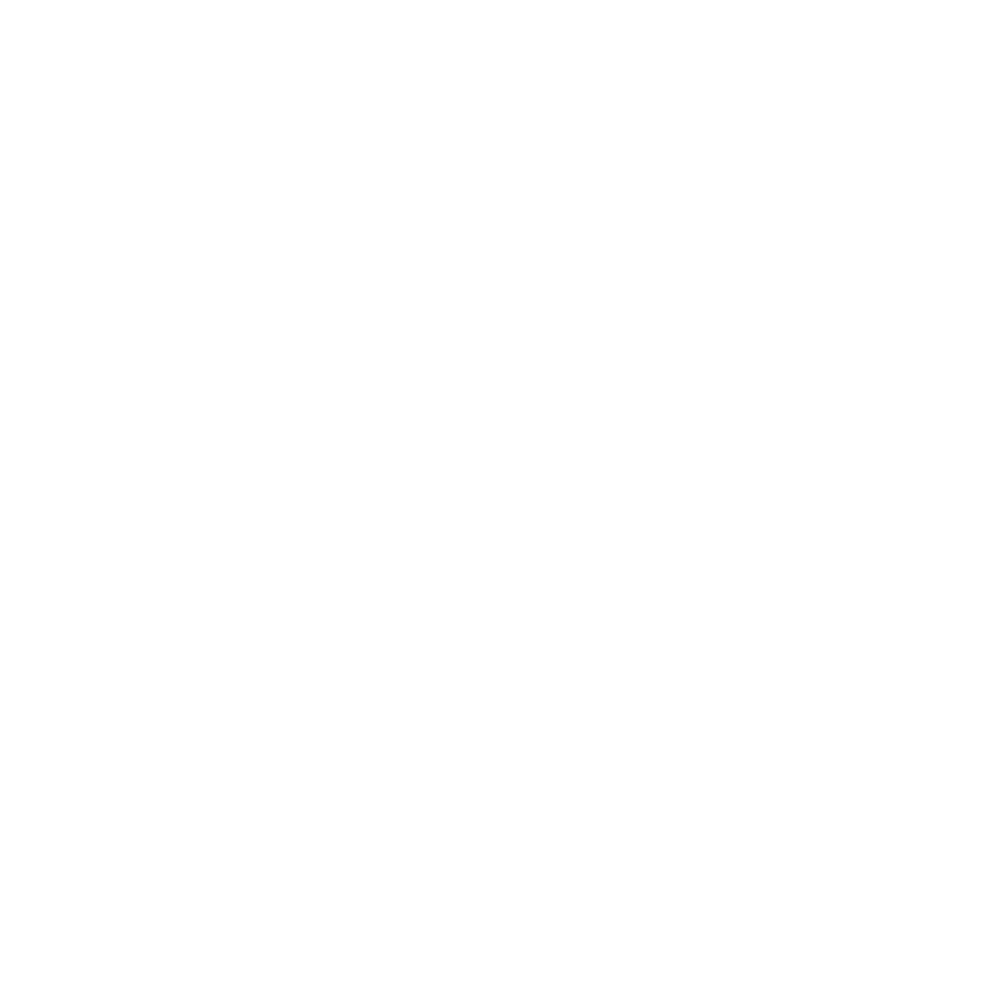
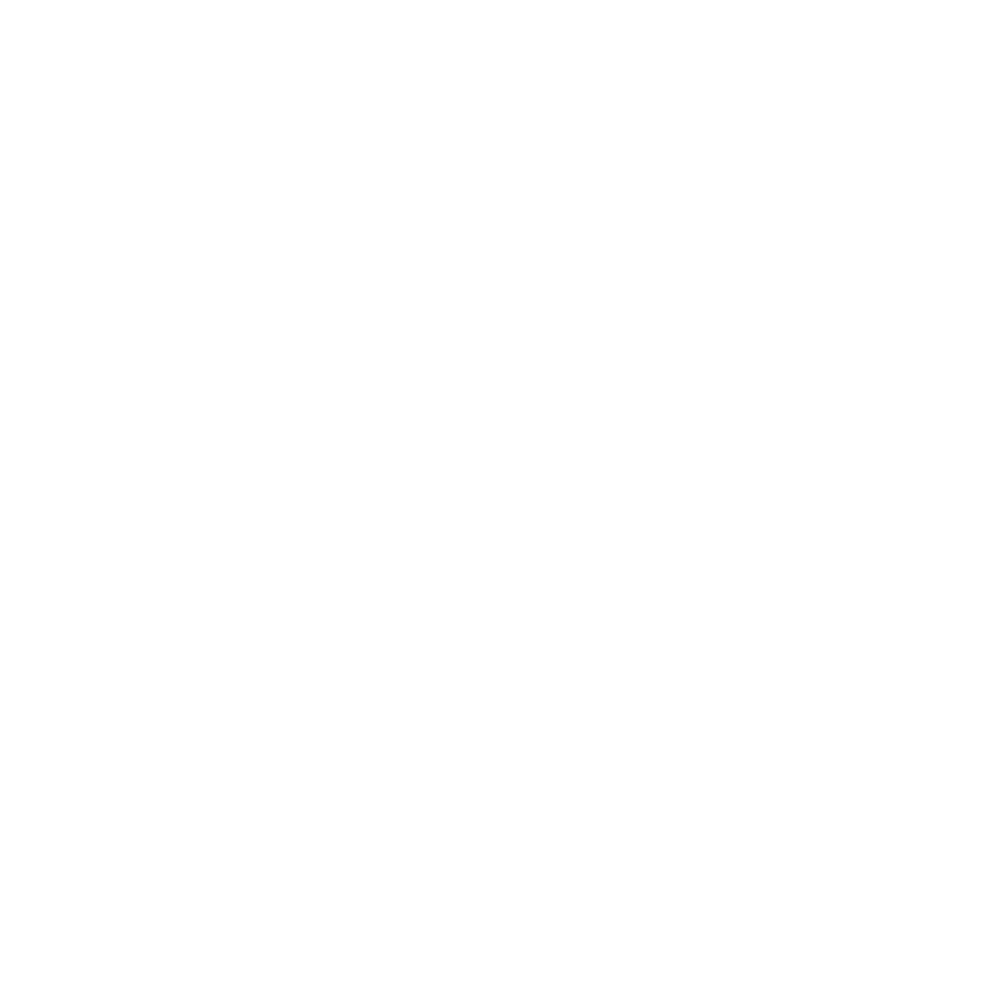
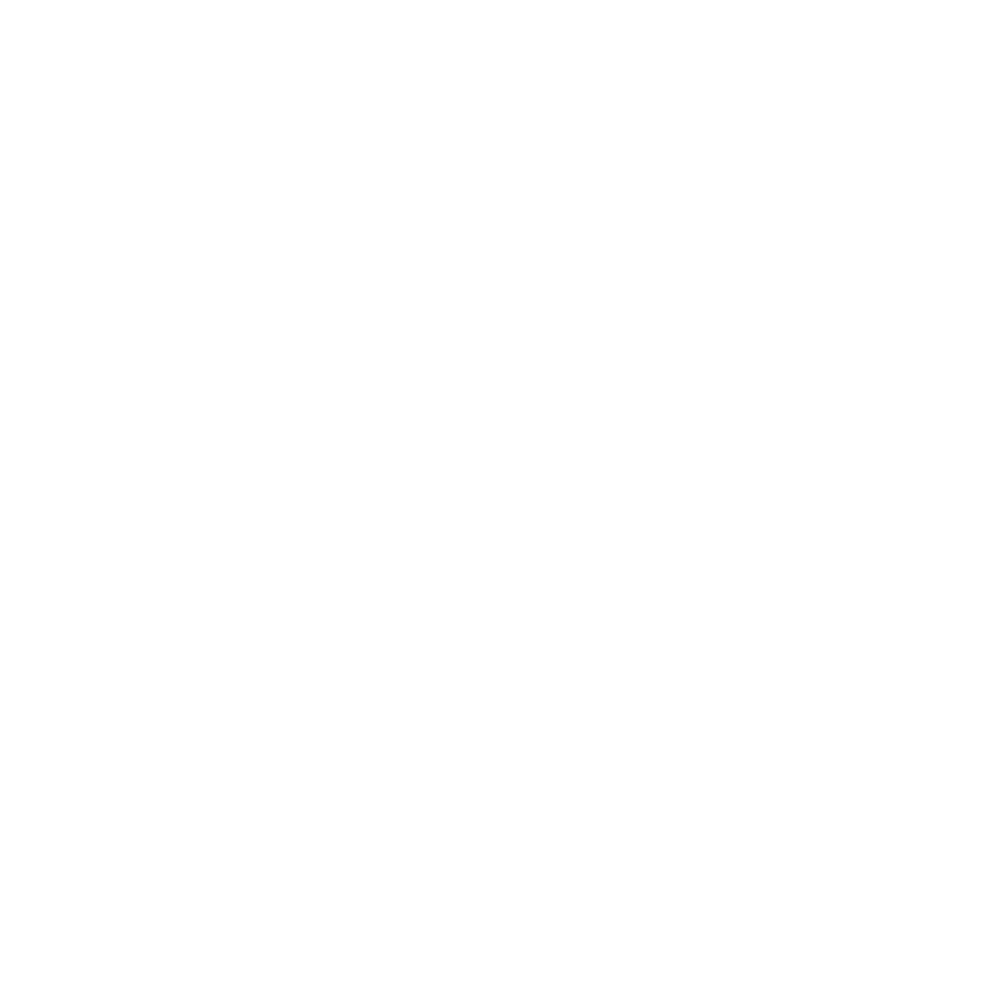
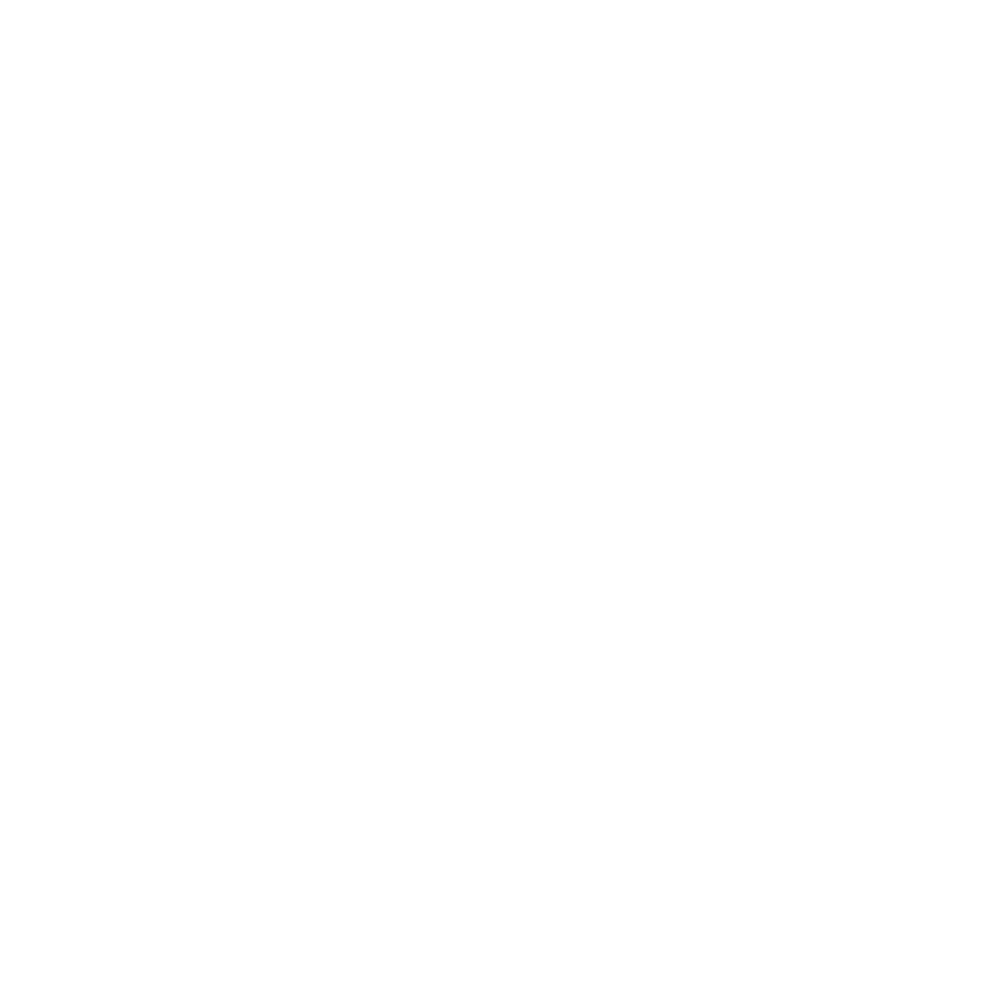
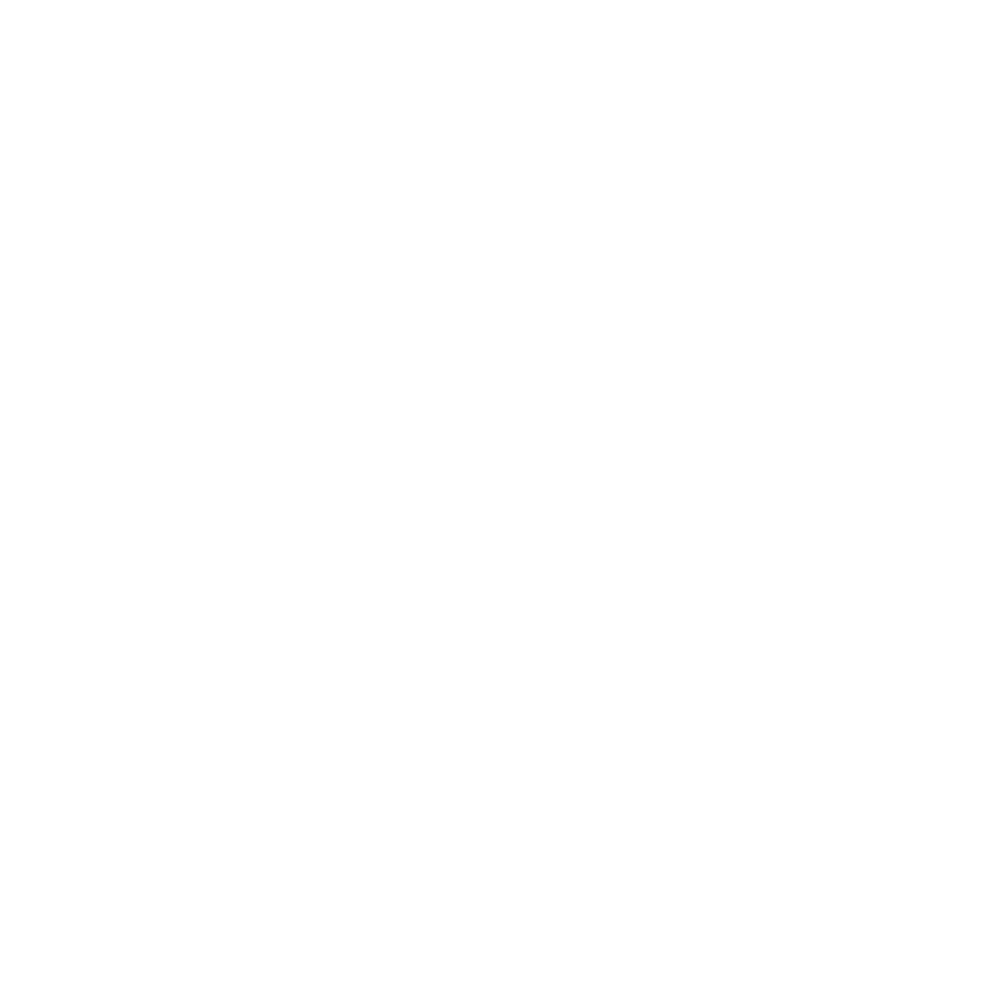
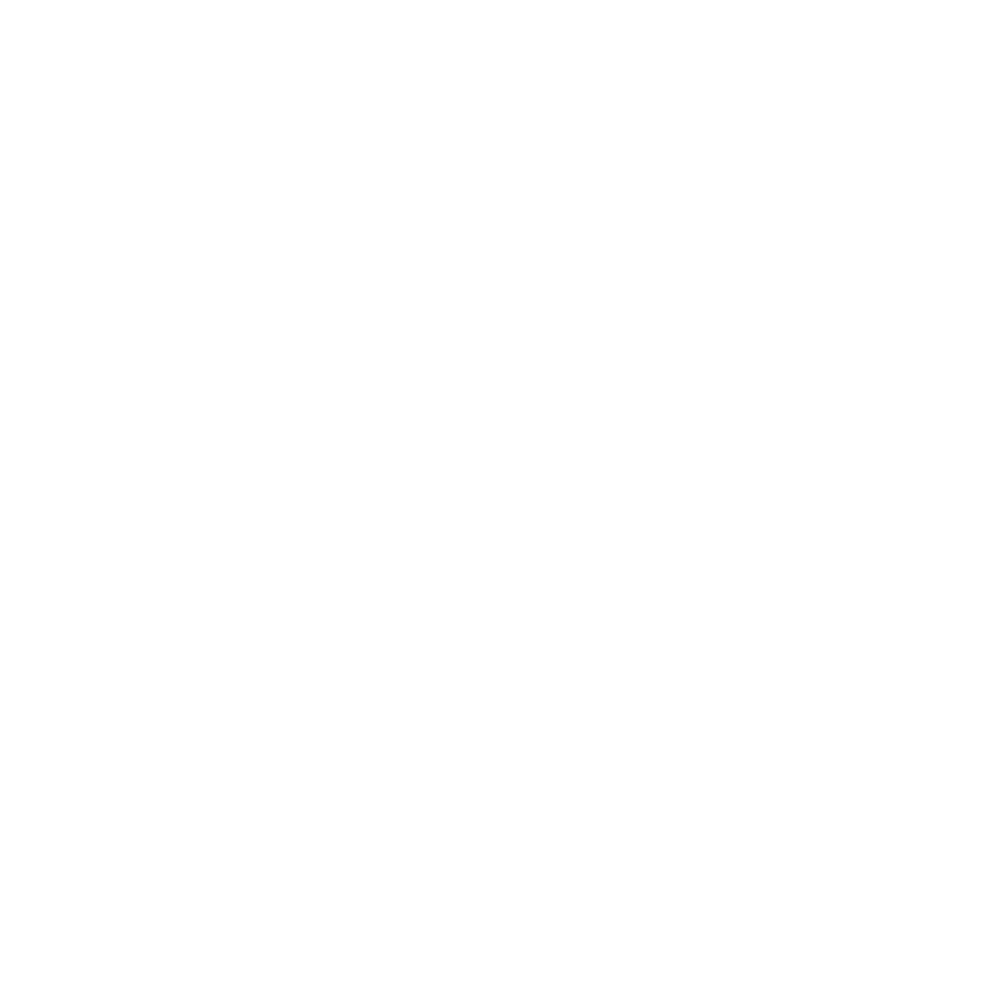

In [7]:
r = requests.get(url)
print(r.text)

In [51]:
soup = BeautifulSoup(r.text, 'html.parser')

# Find the table in the HTML
table = soup.find('table')

# Find all the rows in the table
rows = table.find_all('tr')

# Let's say you want to extrapolate the first column of the table
min_wages = [([elem for elem in row][3]).text for row in rows][1:]

In [52]:
[int(min_wage[:-1]) for min_wage in min_wages]

[984,
 944,
 913,
 885,
 885,
 858,
 832,
 807,
 783,
 765,
 749,
 735,
 728,
 725,
 713,
 711,
 697,
 682,
 677,
 673,
 671,
 671]

## getting all data and parsing at once

In [54]:
prefectures_japan = ["北海道", "青森県", "岩手県", "宮城県", "秋田県", "山形県",
                     "福島県", "茨城県", "栃木県", "群馬県", "埼玉県", "千葉県",
                     "東京都", "神奈川県", "新潟県", "富山県", "石川県", "福井県",
                     "山梨県", "長野県", "岐阜県", "静岡県", "愛知県", "三重県", "滋賀県",
                     "京都府", "大阪府", "兵庫県", "奈良県", "和歌山県", "鳥取県", "島根県",
                     "岡山県", "広島県", "山口県", "徳島県", "香川県", "愛媛県", "高知県",
                     "福岡県","佐賀県","長崎県","熊本県","大分県","宮崎県","鹿児島県","沖縄県"]


min_wages_prefectures = []
for pref in prefectures_japan:
    url = f"https://tool.shlc.jp/saichin_pref/?pr={pref}"
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    table = soup.find('table')
    rows = table.find_all('tr')
    min_wages_unformatted = [([elem for elem in row][3]).text for row in rows][1:]
    min_wages = [int(min_wage[:-1]) for min_wage in min_wages_unformatted]
    min_wages_prefectures.append(min_wages)

In [57]:
min_wages_prefectures

[[960,
  920,
  889,
  861,
  861,
  835,
  810,
  786,
  764,
  748,
  734,
  719,
  705,
  691,
  678,
  667,
  654,
  644,
  641,
  638,
  637,
  637],
 [898,
  853,
  822,
  793,
  790,
  762,
  738,
  716,
  695,
  679,
  665,
  654,
  647,
  645,
  633,
  630,
  619,
  610,
  608,
  606,
  605,
  605],
 [893,
  854,
  821,
  793,
  790,
  762,
  738,
  716,
  695,
  678,
  665,
  653,
  645,
  644,
  631,
  628,
  619,
  610,
  608,
  606,
  605,
  605],
 [923,
  883,
  853,
  825,
  824,
  798,
  772,
  748,
  726,
  710,
  696,
  685,
  675,
  674,
  662,
  653,
  639,
  628,
  623,
  619,
  617,
  617],
 [897,
  853,
  822,
  792,
  790,
  762,
  738,
  716,
  695,
  679,
  665,
  654,
  647,
  645,
  632,
  629,
  618,
  610,
  608,
  606,
  605,
  605],
 [900,
  854,
  822,
  793,
  790,
  763,
  739,
  717,
  696,
  680,
  665,
  654,
  647,
  645,
  631,
  629,
  620,
  613,
  610,
  607,
  606,
  605],
 [900,
  858,
  828,
  800,
  798,
  772,
  748,
  726,
  705,
  689,


In [58]:
with open("raw_min_wages.txt", "w") as file:
    file.write(str(min_wages_prefectures))

In [63]:
years = [year for year in range(2023, 2002-1, -1)]

In [67]:
prefectures_japan_english = ["Hokkai Do", "Aomori Ken", "Iwate Ken", "Miyagi Ken", "Akita Ken",
                             "Yamagata Ken", "Fukushima Ken", "Ibaraki Ken", "Tochigi Ken", "Gunma Ken",
                             "Saitama Ken", "Chiba Ken", "Tokyo To", "Kanagawa Ken", "Niigata Ken",
                             "Toyama Ken", "Ishikawa Ken", "Fukui Ken", "Yamanashi Ken", "Nagano Ken",
                             "Gifu Ken", "Shizuoka Ken", "Aichi Ken", "Mie Ken", "Shiga Ken", "Kyoto Fu",
                             "Osaka Fu", "Hyogo Ken", "Nara Ken", "Wakayama Ken", "Tottori Ken", "Shimane Ken",
                             "Okayama Ken","Hiroshima Ken","Yamaguchi Ken","Tokushima Ken","Kagawa Ken",
                             "Ehime Ken","Kochi Ken","Fukuoka Ken","Saga Ken","Nagasaki Ken","Kumamoto Ken",
                             "Oita Ken","Miyazaki Ken","Kagoshima Ken","Okinawa Ken"]

In [68]:
pd.DataFrame({"years":years, "min_wage": min_wages_prefectures[0], "prefecture": prefectures_japan_english[0]})

,years,min_wage,prefecture
0,2023,960,Hokkai Do
1,2022,920,Hokkai Do
2,2021,889,Hokkai Do
3,2020,861,Hokkai Do
4,2019,861,Hokkai Do
5,2018,835,Hokkai Do
6,2017,810,Hokkai Do
7,2016,786,Hokkai Do
8,2015,764,Hokkai Do
9,2014,748,Hokkai Do


In [71]:
min_wage_dfs = []

for i in range(len(min_wages_prefectures)):
    min_wage_df_pref = pd.DataFrame({"year":years, "prefecture": prefectures_japan_english[i], "min_wage": min_wages_prefectures[i]})
    min_wage_dfs.append(min_wage_df_pref)

df_min_wage = pd.concat(min_wage_dfs, axis=0, ignore_index=True)

In [72]:
df_min_wage

,year,prefecture,min_wage
0,2023,Hokkai Do,960
1,2022,Hokkai Do,920
2,2021,Hokkai Do,889
3,2020,Hokkai Do,861
4,2019,Hokkai Do,861
...,...,...,...
1029,2006,Okinawa Ken,610
1030,2005,Okinawa Ken,608
1031,2004,Okinawa Ken,606
1032,2003,Okinawa Ken,605


In [73]:
df_min_wage.to_csv("min_wage_japan_2002_to_2023.csv", index=False)

In [76]:
df_min_wage["min_wage"].max()

1113